In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import plotly.graph_objects as go

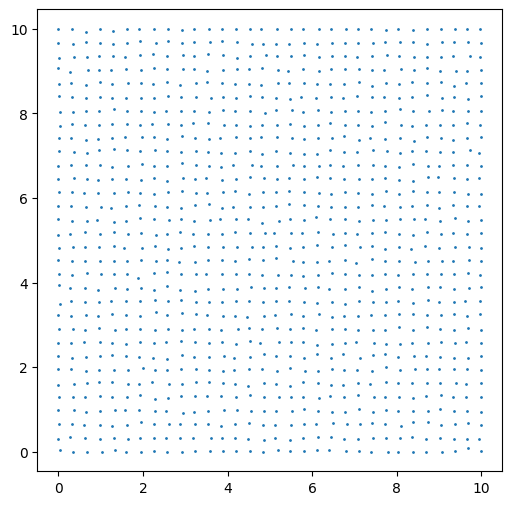

In [2]:
# Generate particle data (1024 particles in a 2D space, evenly spaced in a square grid with some noise)
np.random.seed(0)
numParticles = 1024
scaleFactor = 10
x = np.linspace(0, 1, int(np.sqrt(numParticles)))
y = np.linspace(0, 1, int(np.sqrt(numParticles)))
x, y = np.meshgrid(x, y)
x = x.flatten()
y = y.flatten()
x += 0.0025 * np.random.randn(x.size)
x*= scaleFactor
x[x < 0] = 0
x[x > 10] = 10
y += 0.0025 * np.random.randn(y.size)
y *= scaleFactor
y[y < 0] = 0
y[y > 10] = 10

# x += 2.1
# y += 2.1


# Create a scatter plot (matplotlib)
plt.figure(figsize=(6, 6))
plt.scatter(x, y, s=1)
plt.axis('equal')

plt.show()

In [3]:
gridSizeX, gridSizeY = 16, 16
simSizeX, simSizeY = scaleFactor,scaleFactor

numCells = gridSizeX * gridSizeY

# Conversion factors
world_to_grid_x = gridSizeX / simSizeX
world_to_grid_y = gridSizeY / simSizeY

# Map particles to cells
numCellParticles = np.zeros(numCells, dtype=int)
firstCellParticle = np.zeros(numCells + 1, dtype=int)
cellParticleIds = np.full(numParticles, -1, dtype=int)

# Step 1: Calculate the cell index for each particle
cell_xs = np.floor(x * world_to_grid_x).astype(int)
cell_ys = np.floor(y * world_to_grid_y).astype(int)

cell_xs = np.clip(cell_xs, 0, gridSizeX - 1)
cell_ys = np.clip(cell_ys, 0, gridSizeY - 1)

cell_nrs = cell_xs + cell_ys * gridSizeX   # Row-major

np.add.at(numCellParticles, cell_nrs, 1)

firstCellParticle[:numCells] = np.cumsum(numCellParticles)
firstCellParticle[numCells] = firstCellParticle[numCells-1]  # Guard cell

# Counting sort (WRONG)
# cellCounts = firstCellParticle.copy()
# for i in range(numParticles):
#     cell_nr = cell_nrs[i]
#     cellCounts[cell_nr] -= 1
#     idx = cellCounts[cell_nr]
#     cellParticleIds[idx] = i

print(numParticles)
print(len(x))

for i in range(numParticles):
    # Get particle position
    x_pos = x[i]
    y_pos = y[i]

    # Compute cell indices
    cell_x = int(np.clip(np.floor(x_pos * world_to_grid_x), 0, gridSizeX - 1))
    cell_y = int(np.clip(np.floor(y_pos * world_to_grid_y), 0, gridSizeY - 1))
    
    # Compute cell number (1D index)
    cell_nr = cell_x + cell_y * gridSizeX

    # Decrement firstCellParticle and assign particle ID
    firstCellParticle[cell_nr] -= 1
    cellParticleIds[firstCellParticle[cell_nr]] = i



1024
1024


Selected particle:  5.210188130286912 2.585826929964663
Cell index:  8 4
Neighborhood cells X: 7 9 , Y: 3 5


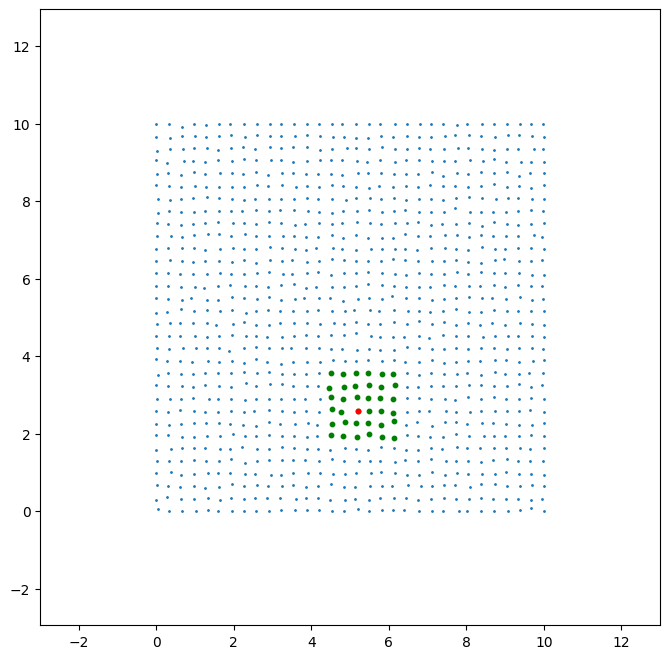

[2.3086513148732815, 2.249319961626244, 1.9474612515701974, 1.9614612819772017, 2.9025808424952504, 2.935942525260417, 2.5666056925502416, 2.620858215189041, 3.535706235226821, 3.5587393806190337, 3.2084105736291644, 3.1800557378522076, 2.2670457450418686, 2.270699189593466, 1.9789032448921595, 1.9160292829313388, 2.9118881675017816, 2.931857360777093, 2.5883384756573085, 2.585826929964663, 3.5744263064946584, 3.552253817615352, 3.263955390635023, 3.2319756022124024, 2.3141545634935983, 2.2185021541794883, 1.895916729922672, 1.8993194237168445, 2.883864332232342, 2.9225798216970826, 2.531681437411909, 2.584626422999665, 3.52466377650295, 3.547405396998245, 3.247857866596978, 3.2064871545384483] [4.855632378295111, 4.526785500527517, 4.820258904689213, 4.515520879148091, 4.821705222319434, 4.51317493112985, 4.769394858508688, 4.5261051908990675, 4.828838439568519, 4.511362694918529, 4.853867665528339, 4.449649726308146, 5.473939172383715, 5.145354396941839, 5.481417208000861, 5.16828843

In [4]:
# Retrieve a random particle from the cell and get the neighborhood

# Select a random particle
particle_idx = random.randint(0, numParticles - 1)
# particle_idx = numParticles - 1
particle_x, particle_y = x[particle_idx], y[particle_idx]

print("Selected particle: ", particle_x, particle_y)
#OK

# Calculate the cell index for the selected particle
cell_x = int(np.floor(particle_x * world_to_grid_x))
cell_y = int(np.floor(particle_y * world_to_grid_y))
cell_x = np.clip(cell_x, 0, gridSizeX - 1)
cell_y = np.clip(cell_y, 0, gridSizeY - 1)

print("Cell index: ", cell_x, cell_y)
#OK

# Symmetric neighborhood
x0 = max(cell_x - 1, 0)
x1 = min(cell_x + 1, gridSizeX - 1)
y0 = max(cell_y - 1, 0)
y1 = min(cell_y + 1, gridSizeY - 1)

print("Neighborhood cells X:", x0, x1, ", Y:", y0, y1)

# x0 = max(cell_x - 2, 0)
# x1 = min(cell_x, gridSizeX - 1) 
# y0 = max(cell_y - 1, 0)  
# y1 = min(cell_y + 1, gridSizeY - 1)  

neighborhoodX = []
neighborhoodY = []
for xx in range(x0, x1+1):
    for yy in range(y0, y1+1):

        if xx < 0 or xx >= gridSizeX or yy < 0 or yy >= gridSizeY:
            continue

        cell_nr = xx + yy * gridSizeX   # Row-major

        # Check if cells are physically adjacent in 2D space
        # This prevents wrapping from right edge to left edge
        dx = abs(xx - cell_x)
        dy = abs(yy - cell_y)
        if dx > 1 or dy > 1:  # If cells are more than 1 unit apart in grid space
            continue  # Skip this cell as it's not physically adjacent

        start = firstCellParticle[cell_nr]
        end = firstCellParticle[cell_nr + 1] 

        for idx in range(start, end):
            if cellParticleIds[idx] >= 0:
                pid = (cellParticleIds[idx])
                neighborhoodX.append(x[pid])
                neighborhoodY.append(y[pid])


# Plot the neighborhood
plt.figure(figsize=(8, 8))
plt.scatter(x, y, s=1)
plt.scatter(neighborhoodX, neighborhoodY, s=10, c='g')
plt.scatter(particle_x, particle_y, s=10, c='r')
plt.axis('equal')
plt.xlim(-3,scaleFactor+3)
plt.ylim(-3,scaleFactor+3)
plt.show()

print(neighborhoodY, neighborhoodX)
print(particle_x, particle_y)

print("Particle cell: ", cell_x, cell_y)
print("Neighborhood cells X:", x0, x1, ", Y:", y0, y1)